In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/processed_sa_bert_price_diff.csv', index_col=[0])
df

,positive,negative,neutral,none,count,known,to_predict
Date,,,,,,,
2018-01-03,22,11,1,0,34,0.37,-0.190000
2018-01-04,24,8,4,0,36,-0.19,-0.040000
2018-01-05,21,5,2,0,28,-0.04,0.010000
2018-01-08,24,1,1,0,26,0.01,-0.140000
2018-01-09,25,8,5,0,38,-0.14,-0.140000
...,...,...,...,...,...,...,...
2018-05-24,14,5,3,0,22,-0.17,-0.040000
2018-05-25,14,3,1,0,18,-0.04,0.120000
2018-05-29,20,5,2,0,27,0.12,0.010000


In [3]:
def sa_movement_df():
    def _map(val):
        if val <= 0:
            return -1
        else:
            return 1
    df = pd.read_csv('./data/processed_sa_bert_price_diff.csv', index_col=[0])
    df['to_predict'] = df['to_predict'].apply(lambda x:_map(x))
    return df
# plt.plot(sa_movement_df()['to_predict'])
sa_movement_df()

,positive,negative,neutral,none,count,known,to_predict
Date,,,,,,,
2018-01-03,22,11,1,0,34,0.37,-1
2018-01-04,24,8,4,0,36,-0.19,-1
2018-01-05,21,5,2,0,28,-0.04,1
2018-01-08,24,1,1,0,26,0.01,-1
2018-01-09,25,8,5,0,38,-0.14,-1
...,...,...,...,...,...,...,...
2018-05-24,14,5,3,0,22,-0.17,-1
2018-05-25,14,3,1,0,18,-0.04,1
2018-05-29,20,5,2,0,27,0.12,1


In [4]:
def absa_movement_df():
    def _map(val):
        if val <= 0: # 0 就是亏了，还有手续费等等，简化模型为binary classification
            return -1
        else:
            return 1
    absa_df = pd.read_csv('./data/processed_absa_price_diff.csv')

#     absa_df = absa_df.drop(columns=['Date'])
#     print(absa_df.columns[:-3])
    for col in absa_df.columns[:-3]:
        if col == 'Date':
            continue
        absa_df[col] /= absa_df['count']
    absa_df = absa_df.drop(columns=['count'])
    absa_df['to_predict'] = absa_df['to_predict'].apply(lambda x:_map(x))
    return absa_df
absa_movement_df()

,Date,quality_positive,quality_negative,quality_neutral,quality_none,connectivity_positive,connectivity_negative,connectivity_neutral,connectivity_none,usability_positive,...,design features_positive,design features_negative,design features_neutral,design features_none,price_positive,price_negative,price_neutral,price_none,known,to_predict
0,2018-01-03,0.147059,0.117647,0.0,0.735294,0.0,0.0,0.0,1.0,0.058824,...,0.264706,0.029412,0.0,0.705882,0.088235,0.000000,0.0,0.911765,0.37,-1
1,2018-01-04,0.250000,0.111111,0.0,0.638889,0.0,0.0,0.0,1.0,0.055556,...,0.166667,0.083333,0.0,0.750000,0.055556,0.000000,0.0,0.944444,-0.19,-1
2,2018-01-05,0.285714,0.035714,0.0,0.678571,0.0,0.0,0.0,1.0,0.035714,...,0.178571,0.000000,0.0,0.821429,0.107143,0.000000,0.0,0.892857,-0.04,1
3,2018-01-08,0.307692,0.000000,0.0,0.692308,0.0,0.0,0.0,1.0,0.038462,...,0.269231,0.000000,0.0,0.730769,0.115385,0.000000,0.0,0.884615,0.01,-1
4,2018-01-09,0.210526,0.078947,0.0,0.710526,0.0,0.0,0.0,1.0,0.052632,...,0.184211,0.078947,0.0,0.736842,0.105263,0.000000,0.0,0.894737,-0.14,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2018-05-24,0.318182,0.136364,0.0,0.545455,0.0,0.0,0.0,1.0,0.045455,...,0.136364,0.000000,0.0,0.863636,0.227273,0.000000,0.0,0.772727,-0.17,-1
99,2018-05-25,0.277778,0.000000,0.0,0.722222,0.0,0.0,0.0,1.0,0.055556,...,0.055556,0.000000,0.0,0.944444,0.277778,0.000000,0.0,0.722222,-0.04,1
100,2018-05-29,0.222222,0.037037,0.0,0.740741,0.0,0.0,0.0,1.0,0.037037,...,0.148148,0.037037,0.0,0.814815,0.074074,0.037037,0.0,0.888889,0.12,1
101,2018-05-30,0.379310,0.068966,0.0,0.551724,0.0,0.0,0.0,1.0,0.034483,...,0.137931,0.137931,0.0,0.724138,0.068966,0.034483,0.0,0.896552,0.01,-1


In [5]:
def absa_movement_no_known_df():
    def _map(val):
        if val <= 0:
            return -1
        else:
            return 1
    absa_df = pd.read_csv('./data/processed_absa_price_diff.csv')

#     absa_df = absa_df.drop(columns=['Date'])
#     print(absa_df.columns[:-3])
    for col in absa_df.columns[:-3]:
        if col == 'Date':
            continue
        absa_df[col] /= absa_df['count']
    absa_df = absa_df.drop(columns=['count','known'])
    absa_df['to_predict'] = absa_df['to_predict'].apply(lambda x:_map(x))
    absa_df = absa_df.drop(columns=['Date'])
    
    return absa_df
absa_movement_no_known_df()

,quality_positive,quality_negative,quality_neutral,quality_none,connectivity_positive,connectivity_negative,connectivity_neutral,connectivity_none,usability_positive,usability_negative,...,operation performance_none,design features_positive,design features_negative,design features_neutral,design features_none,price_positive,price_negative,price_neutral,price_none,to_predict
0,0.147059,0.117647,0.0,0.735294,0.0,0.0,0.0,1.0,0.058824,0.0,...,0.735294,0.264706,0.029412,0.0,0.705882,0.088235,0.000000,0.0,0.911765,-1
1,0.250000,0.111111,0.0,0.638889,0.0,0.0,0.0,1.0,0.055556,0.0,...,0.750000,0.166667,0.083333,0.0,0.750000,0.055556,0.000000,0.0,0.944444,-1
2,0.285714,0.035714,0.0,0.678571,0.0,0.0,0.0,1.0,0.035714,0.0,...,0.785714,0.178571,0.000000,0.0,0.821429,0.107143,0.000000,0.0,0.892857,1
3,0.307692,0.000000,0.0,0.692308,0.0,0.0,0.0,1.0,0.038462,0.0,...,0.692308,0.269231,0.000000,0.0,0.730769,0.115385,0.000000,0.0,0.884615,-1
4,0.210526,0.078947,0.0,0.710526,0.0,0.0,0.0,1.0,0.052632,0.0,...,0.815789,0.184211,0.078947,0.0,0.736842,0.105263,0.000000,0.0,0.894737,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.318182,0.136364,0.0,0.545455,0.0,0.0,0.0,1.0,0.045455,0.0,...,0.636364,0.136364,0.000000,0.0,0.863636,0.227273,0.000000,0.0,0.772727,-1
99,0.277778,0.000000,0.0,0.722222,0.0,0.0,0.0,1.0,0.055556,0.0,...,0.777778,0.055556,0.000000,0.0,0.944444,0.277778,0.000000,0.0,0.722222,1
100,0.222222,0.037037,0.0,0.740741,0.0,0.0,0.0,1.0,0.037037,0.0,...,0.740741,0.148148,0.037037,0.0,0.814815,0.074074,0.037037,0.0,0.888889,1
101,0.379310,0.068966,0.0,0.551724,0.0,0.0,0.0,1.0,0.034483,0.0,...,0.689655,0.137931,0.137931,0.0,0.724138,0.068966,0.034483,0.0,0.896552,-1


In [6]:
def pure_movement_df():
    def _map(val):
        if val <= 0:
            return -1
        else:
            return 1
    df = pd.read_csv('./data/processed_sa_bert_price_diff.csv')
    df = df[['Date','known','to_predict']]
    df['to_predict'] = df['to_predict'].apply(lambda x:_map(x))
    return df
pure_movement_df()

,Date,known,to_predict
0,2018-01-03,0.37,-1
1,2018-01-04,-0.19,-1
2,2018-01-05,-0.04,1
3,2018-01-08,0.01,-1
4,2018-01-09,-0.14,-1
...,...,...,...
98,2018-05-24,-0.17,-1
99,2018-05-25,-0.04,1
100,2018-05-29,0.12,1
101,2018-05-30,0.01,-1


# Feature Engineering

In [7]:
import pandas as pd

# Load data
df = absa_movement_no_known_df()

# Calculate correlation with 'to_predict' using Pearson and Spearman methods
corr_pearson = df.corr(method='pearson')['to_predict'].abs()
corr_spearman = df.corr(method='spearman')['to_predict'].abs()
corr_df = pd.concat([corr_pearson, corr_spearman], axis=1, keys=['pearson', 'spearman'])
corr_df = corr_df.sort_values(by='spearman', ascending=False)

# Calculate non-zero count for each column
non_zero_count = []
for col in corr_df.index:
    non_zero_count.append(df[col].astype(bool).sum(axis=0))

# Combine into a dataframe
data = {'abs(pearson)': corr_df['pearson'].values,
        'abs(spearman)': corr_df['spearman'].values,
        'non-zero count': non_zero_count}
result_df = pd.DataFrame(data, index=corr_df.index)

# Filter by non-zero count and exclude 'none' sentiment
result_df = result_df[(result_df['non-zero count'] >= 20) & (~result_df.index.str.contains('none'))]

# Sort by spearman correlation
result_df = result_df.sort_values(by='abs(spearman)', ascending=False)

# Print result
result_df


,abs(pearson),abs(spearman),non-zero count
to_predict,1.000000,1.000000,103
usability_positive,0.111567,0.146538,73
design features_negative,0.212056,0.146490,45
general_neutral,0.154704,0.120351,23
price_positive,0.086488,0.103642,84
quality_positive,0.156333,0.094395,100
operation performance_negative,0.080409,0.090183,81
operation performance_positive,0.094496,0.060943,99
general_negative,0.063954,0.049698,93
design features_positive,0.048753,0.047697,97


In [8]:
result_df = result_df.drop('to_predict')
result_df

,abs(pearson),abs(spearman),non-zero count
usability_positive,0.111567,0.146538,73
design features_negative,0.212056,0.146490,45
general_neutral,0.154704,0.120351,23
price_positive,0.086488,0.103642,84
quality_positive,0.156333,0.094395,100
operation performance_negative,0.080409,0.090183,81
operation performance_positive,0.094496,0.060943,99
general_negative,0.063954,0.049698,93
design features_positive,0.048753,0.047697,97
general_positive,0.014869,0.015566,102


In [9]:
result_df.index

Index(['usability_positive', 'design features_negative', 'general_neutral',
       'price_positive', 'quality_positive', 'operation performance_negative',
       'operation performance_positive', 'general_negative',
       'design features_positive', 'general_positive', 'quality_negative'],
      dtype='object')

# generalized linear model

## Logistic Regression with Increasing Number of Features in the order of correlation (no previous price)

/Users/donglingu/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


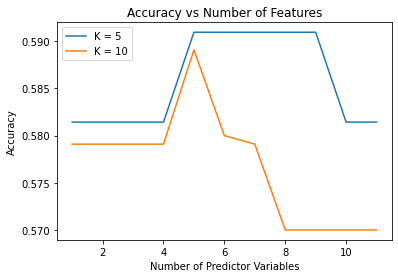

Model: ['usability_positive']
K = 5, Accuracy: 0.5814 +/- 0.0894
Confusion Matrix:
[[12.   0. ]
 [ 8.6  0. ]]

K = 10, Accuracy: 0.5791 +/- 0.1262
Confusion Matrix:
[[6.  0. ]
 [4.3 0. ]]

Model: ['usability_positive', 'design features_negative']
K = 5, Accuracy: 0.5814 +/- 0.0894
Confusion Matrix:
[[12.   0. ]
 [ 8.6  0. ]]

K = 10, Accuracy: 0.5791 +/- 0.1262
Confusion Matrix:
[[6.  0. ]
 [4.3 0. ]]

Model: ['usability_positive', 'design features_negative', 'general_neutral']
K = 5, Accuracy: 0.5814 +/- 0.0894
Confusion Matrix:
[[12.   0. ]
 [ 8.6  0. ]]

K = 10, Accuracy: 0.5791 +/- 0.1262
Confusion Matrix:
[[6.  0. ]
 [4.3 0. ]]

Model: ['usability_positive', 'design features_negative', 'general_neutral', 'price_positive']
K = 5, Accuracy: 0.5814 +/- 0.0894
Confusion Matrix:
[[12.   0. ]
 [ 8.6  0. ]]

K = 10, Accuracy: 0.5791 +/- 0.1262
Confusion Matrix:
[[6.  0. ]
 [4.3 0. ]]

Model: ['usability_positive', 'design features_negative', 'general_neutral', 'price_positive', 'quality_

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Load data
df = absa_movement_no_known_df()

# Select relevant features
features = ['usability_positive', 'design features_negative', 'general_neutral', 'price_positive', 
            'quality_positive', 'operation performance_negative', 'operation performance_positive', 
            'general_negative', 'design features_positive', 'general_positive', 'quality_negative']

# Define a range of K values
k_values = (5,10)

# Define a list of models to train
models = []
for i in range(len(features)):
    models.append(features[:i+1])

# Define a dictionary to store the accuracy values for each model and K value
accuracy_dict = {str(model): {k: [] for k in k_values} for model in models}

# Define a dictionary to store the confusion matrix for each model and K value
confusion_dict = {str(model): {k: [] for k in k_values} for model in models}

# Loop through the models and K values and perform K-fold cross-validation
for model in models:
    X = df[model].values
    y = df['to_predict'].values
    for k in k_values:
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            # Define and fit the logistic regression model
            clf = LogisticRegression()
            clf.fit(X_train, y_train)
            
            # Predict on the test data and calculate the accuracy and confusion matrix
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            confusion = confusion_matrix(y_test, y_pred)
            
            # Store the accuracy and confusion matrix in the dictionaries
            accuracy_dict[str(model)][k].append(accuracy)
            confusion_dict[str(model)][k].append(confusion)

# Visualize accuracy vs number of features
num_features = list(range(1, len(features)+1))
accuracy_k5 = [np.mean(accuracy_dict[str(model)][5]) for model in models]
accuracy_k10 = [np.mean(accuracy_dict[str(model)][10]) for model in models]

plt.plot(num_features, accuracy_k5, label='K = 5')
plt.plot(num_features, accuracy_k10, label='K = 10')
plt.xlabel('Number of Predictor Variables')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Features')
plt.legend()
plt.show()

# Print the results
for model in models:
    print(f'Model: {model}')
    for k in k_values:
        accuracy_values = accuracy_dict[str(model)][k]
        mean_accuracy = np.mean(accuracy_values)
        std_accuracy = np.std(accuracy_values)
        mean_confusion = np.mean(confusion_dict[str(model)][k], axis=0)
        print(f'K = {k}, Accuracy: {mean_accuracy:.4f} +/- {std_accuracy:.4f}')
        print('Confusion Matrix:')
        print(mean_confusion)
        print()


In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import ipywidgets as widgets
from IPython.display import display

# Your existing data loading and model training code

# Function to visualize the confusion matrix
def plot_confusion_matrix(confusion_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='viridis')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()


# Interactive widget to select K value
k_slider = widgets.ToggleButtons(options=[5, 10], description='K Value:')

# Interactive widget to select the number of features
num_features_slider = widgets.IntSlider(min=1, max=len(features), description='Features:')

# Function to update the confusion matrix plot
def update_plot(k, num_features):
    selected_model = num_features - 1
    mean_confusion = np.mean(confusion_dict[str(models[selected_model])][k], axis=0)
    plot_confusion_matrix(mean_confusion, f'Num Features: {len(models[selected_model])}, K = {k}')

# Interactive widget to display the confusion matrix based on the selected K value and number of features
interactive_plot = widgets.interactive(update_plot, k=k_slider, num_features=num_features_slider)

# Display the interactive widgets
display(interactive_plot)

interactive(children=(ToggleButtons(description='K Value:', options=(5, 10), value=5), IntSlider(value=1, desc…

## Multi-Layer Perceptron with different number of hidden units (1 layer) (no previous close price)

In [16]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Load data
df = absa_movement_no_known_df()

# Select relevant features
features = ['usability_positive', 'design features_negative', 'general_neutral', 'price_positive', 
            'quality_positive', 'operation performance_negative', 'operation performance_positive', 
            'general_negative', 'design features_positive', 'general_positive', 'quality_negative']

# Use all features for the MLP model
X = df[features].values
y = df['to_predict'].values

# Set the range of hidden units to test
hidden_units = list(range(1, 21))

# Define a dictionary to store the accuracy values and loss curves for each number of hidden units
accuracy_dict = {hidden_unit: [] for hidden_unit in hidden_units}
loss_curves_dict = {hidden_unit: [] for hidden_unit in hidden_units}

# Train MLP models with different numbers of hidden units
for hidden_unit in hidden_units:
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Define and fit the MLP model
        clf = MLPClassifier(hidden_layer_sizes=(hidden_unit,), random_state=42, max_iter=2000, tol=1e-5)
        clf.fit(X_train, y_train)

        # Predict on the test data and calculate the accuracy
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store the accuracy and loss curve in the dictionaries
        accuracy_dict[hidden_unit].append(accuracy)
        loss_curves_dict[hidden_unit].append(clf.loss_curve_)

# Function to plot training progress and accuracy
def plot_results(hidden_unit):
    plt.figure(figsize=(12, 5))
    
    # Plot training progress (loss curve) on the left subplot
    plt.subplot(1, 2, 1)
    for i, loss_curve in enumerate(loss_curves_dict[hidden_unit]):
        plt.plot(loss_curve, label=f'Fold {i+1}')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Training Progress (Loss) - {hidden_unit} Hidden Units')
    plt.legend()

    # Plot accuracy on the right subplot
    plt.subplot(1, 2, 2)
    accuracies = [np.mean(accuracy_dict[h]) for h in hidden_units]
    plt.bar(hidden_units, accuracies)
    plt.xlabel('Number of Hidden Units')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Number of Hidden Units')

    plt.tight_layout()
    plt.show()

# Interactive widget to select the number of hidden units
hidden_units_slider = widgets.IntSlider(min=1, max=20, description='Hidden Units:')

# Function to update the plot based on the selected number of hidden units
def update_plot(hidden_unit):
    plot_results(hidden_unit)

# the training progress and accuracy based on the selected number of hidden units
interactive_plot = widgets.interactive(update_plot, hidden_unit=hidden_units_slider)

# Display the interactive widgets
display(interactive_plot)


/Users/donglingu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

/Users/donglingu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

/Users/donglingu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

/Users/donglingu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

/Users/donglingu/opt/anaconda3/lib/python3.8/site-packages/sklea

/Users/donglingu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

/Users/donglingu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

/Users/donglingu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

/Users/donglingu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

/Users/donglingu/opt/anaconda3/lib/python3.8/site-packages/sklea

/Users/donglingu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

/Users/donglingu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

/Users/donglingu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

/Users/donglingu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.

/Users/donglingu/opt/anaconda3/lib/python3.8/site-packages/sklea

interactive(children=(IntSlider(value=1, description='Hidden Units:', max=20, min=1), Output()), _dom_classes=…

In [8]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from tqdm.notebook import tqdm
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Your data loading and feature selection code
# Load data
df = absa_movement_df()

# Select relevant features
features = ['usability_positive', 'design features_negative', 'general_neutral', 'price_positive', 
            'quality_positive', 'operation performance_negative', 'operation performance_positive', 
            'general_negative', 'design features_positive', 'general_positive', 'quality_negative']

# Use all features for the MLP model
X = df[features].values
y = df['to_predict'].values

# Set the range of hidden units to test
hidden_units = list(range(1, 21))

# Define a dictionary to store the accuracy values and loss curves for each number of hidden units
accuracy_dict = {hidden_unit: [] for hidden_unit in hidden_units}
loss_curves_dict = {hidden_unit: [] for hidden_unit in hidden_units}

# Train MLP models with different numbers of hidden units
for hidden_unit in tqdm(hidden_units, desc="Training models"):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Define and fit the MLP model
        clf = MLPClassifier(hidden_layer_sizes=(hidden_unit,), random_state=42, max_iter=20000, tol=1e-5)
        clf.fit(X_train, y_train)

        # Predict on the test data and calculate the accuracy
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store the accuracy and loss curve in the dictionaries
        accuracy_dict[hidden_unit].append(accuracy)
        loss_curves_dict[hidden_unit].append(clf.loss_curve_)

# Function to plot training progress and accuracy
def plot_results(hidden_unit):
    plt.figure(figsize=(12, 5))
    
    # Plot training progress (loss curve) on the left subplot
    plt.subplot(1, 2, 1)
    for i, loss_curve in enumerate(loss_curves_dict[hidden_unit]):
        plt.plot(loss_curve, label=f'Fold {i+1}')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Training Progress (Loss) - {hidden_unit} Hidden Units')
    plt.legend()

    # Plot accuracy on the right subplot
    plt.subplot(1, 2, 2)
    accuracies = [np.mean(accuracy_dict[h]) for h in hidden_units]
    selected_accuracy = np.mean(accuracy_dict[hidden_unit])
    plt.bar(hidden_units, accuracies)
    plt.bar(hidden_unit, selected_accuracy, color='orange', label=f'Selected: {hidden_unit}')
    plt.xlabel('Number of Hidden Units')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs Number of Hidden Units (Selected: {hidden_unit}, Acc: {selected_accuracy:.4f})')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Interactive widget to select the number of hidden units
hidden_units_slider = widgets.IntSlider(min=1, max=20, description='Hidden Units:')

# Function to update the plot based on the selected number of hidden units
def update_plot(hidden_unit):
    plot_results(hidden_unit)

# Interactive widget to display the training progress and accuracy based on the selected number of hidden units
interactive_plot = widgets.interactive(update_plot, hidden_unit=hidden_units_slider)

# Display the interactive widgets
display(interactive_plot)


Training models:   0%|          | 0/20 [00:00<?, ?it/s]

interactive(children=(IntSlider(value=1, description='Hidden Units:', max=20, min=1), Output()), _dom_classes=…

Above result: best hiddensize is **8**.

### Prediction on the Best Model

In [15]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm

# Your data loading and feature selection code
# Load data
df = absa_movement_df()

# Select relevant features
features = ['usability_positive', 'design features_negative', 'general_neutral', 'price_positive', 
            'quality_positive', 'operation performance_negative', 'operation performance_positive', 
            'general_negative', 'design features_positive', 'general_positive', 'quality_negative']

# Use all features for the MLP model
X = df[features].values
y = df['to_predict'].values

# Define the number of hidden units that give the best result
best_hidden_units = 8

# Initialize KFold with the desired number of splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an empty array to store the predictions
y_pred_all = np.empty_like(y)

# Train the MLP model using cross-validation and display progress with tqdm
for train_index, test_index in tqdm(kf.split(X), desc="Predicting", total=kf.get_n_splits()):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Define and fit the MLP model
    clf = MLPClassifier(hidden_layer_sizes=(best_hidden_units,), random_state=42, max_iter=20000, tol=1e-5)
    clf.fit(X_train, y_train)

    # Predict on the test data
    y_pred = clf.predict(X_test)

    # Store the predictions in the corresponding indices of y_pred_all
    y_pred_all[test_index] = y_pred

# Create a new column in the original DataFrame to store the predictions
df['predictions'] = y_pred_all

# Select only the specified columns, along with 'to_predict' and 'predictions' columns
result_df = df[features + ['known', 'to_predict', 'predictions']]

# Print the resulting DataFrame
result_df


Predicting:   0%|          | 0/5 [00:00<?, ?it/s]

,usability_positive,design features_negative,general_neutral,price_positive,quality_positive,operation performance_negative,operation performance_positive,general_negative,design features_positive,general_positive,quality_negative,known,to_predict,predictions
0,0.058824,0.029412,0.000000,0.088235,0.147059,0.058824,0.205882,0.176471,0.264706,0.676471,0.117647,0.37,-1,-1
1,0.055556,0.083333,0.000000,0.055556,0.250000,0.111111,0.138889,0.166667,0.166667,0.666667,0.111111,-0.19,-1,-1
2,0.035714,0.000000,0.000000,0.107143,0.285714,0.035714,0.178571,0.178571,0.178571,0.714286,0.035714,-0.04,1,1
3,0.038462,0.000000,0.038462,0.115385,0.307692,0.076923,0.230769,0.038462,0.269231,0.653846,0.000000,0.01,-1,-1
4,0.052632,0.078947,0.000000,0.105263,0.210526,0.078947,0.105263,0.105263,0.184211,0.763158,0.078947,-0.14,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.045455,0.000000,0.000000,0.227273,0.318182,0.181818,0.181818,0.090909,0.136364,0.590909,0.136364,-0.17,-1,1
99,0.055556,0.000000,0.000000,0.277778,0.277778,0.000000,0.222222,0.055556,0.055556,0.833333,0.000000,-0.04,1,1
100,0.037037,0.037037,0.000000,0.074074,0.222222,0.074074,0.185185,0.111111,0.148148,0.592593,0.037037,0.12,1,-1
101,0.034483,0.137931,0.000000,0.068966,0.379310,0.034483,0.275862,0.103448,0.137931,0.724138,0.068966,0.01,-1,-1


In [16]:
result_df.to_csv('./data/6505_MLP_predicted_movement.csv')

In [14]:
result_df.loc[result_df['to_predict']==result_df['predictions']]

,usability_positive,design features_negative,general_neutral,price_positive,quality_positive,operation performance_negative,operation performance_positive,general_negative,design features_positive,general_positive,quality_negative,to_predict,predictions
0,0.058824,0.029412,0.000000,0.088235,0.147059,0.058824,0.205882,0.176471,0.264706,0.676471,0.117647,-1,-1
1,0.055556,0.083333,0.000000,0.055556,0.250000,0.111111,0.138889,0.166667,0.166667,0.666667,0.111111,-1,-1
2,0.035714,0.000000,0.000000,0.107143,0.285714,0.035714,0.178571,0.178571,0.178571,0.714286,0.035714,1,1
3,0.038462,0.000000,0.038462,0.115385,0.307692,0.076923,0.230769,0.038462,0.269231,0.653846,0.000000,-1,-1
4,0.052632,0.078947,0.000000,0.105263,0.210526,0.078947,0.105263,0.105263,0.184211,0.763158,0.078947,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.000000,0.052632,0.000000,0.000000,0.052632,0.263158,0.105263,0.263158,0.157895,0.368421,0.105263,-1,-1
94,0.000000,0.000000,0.157895,0.000000,0.210526,0.052632,0.210526,0.157895,0.052632,0.473684,0.000000,-1,-1
97,0.083333,0.000000,0.000000,0.000000,0.208333,0.083333,0.250000,0.166667,0.125000,0.583333,0.041667,-1,-1
99,0.055556,0.000000,0.000000,0.277778,0.277778,0.000000,0.222222,0.055556,0.055556,0.833333,0.000000,1,1


## MLP with stock price

In [7]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from tqdm.notebook import tqdm
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Your data loading and feature selection code
# Load data
df = absa_movement_df()

# Select relevant features
features = ['known','usability_positive', 'design features_negative', 'general_neutral', 'price_positive', 
            'quality_positive', 'operation performance_negative', 'operation performance_positive', 
            'general_negative', 'design features_positive', 'general_positive', 'quality_negative']

# Use all features for the MLP model
X = df[features].values
y = df['to_predict'].values

# Set the range of hidden units to test
hidden_units = list(range(1, 21))

# Define a dictionary to store the accuracy values and loss curves for each number of hidden units
accuracy_dict = {hidden_unit: [] for hidden_unit in hidden_units}
loss_curves_dict = {hidden_unit: [] for hidden_unit in hidden_units}

# Train MLP models with different numbers of hidden units
for hidden_unit in tqdm(hidden_units, desc="Training models"):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Define and fit the MLP model
        clf = MLPClassifier(hidden_layer_sizes=(hidden_unit,), random_state=42, max_iter=20000, tol=1e-5)
        clf.fit(X_train, y_train)

        # Predict on the test data and calculate the accuracy
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store the accuracy and loss curve in the dictionaries
        accuracy_dict[hidden_unit].append(accuracy)
        loss_curves_dict[hidden_unit].append(clf.loss_curve_)

# Function to plot training progress and accuracy
def plot_results(hidden_unit):
    plt.figure(figsize=(12, 5))
    
    # Plot training progress (loss curve) on the left subplot
    plt.subplot(1, 2, 1)
    for i, loss_curve in enumerate(loss_curves_dict[hidden_unit]):
        plt.plot(loss_curve, label=f'Fold {i+1}')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Training Progress (Loss) - {hidden_unit} Hidden Units')
    plt.legend()

    # Plot accuracy on the right subplot
    plt.subplot(1, 2, 2)
    accuracies = [np.mean(accuracy_dict[h]) for h in hidden_units]
    selected_accuracy = np.mean(accuracy_dict[hidden_unit])
    plt.bar(hidden_units, accuracies)
    plt.bar(hidden_unit, selected_accuracy, color='orange', label=f'Selected: {hidden_unit}')
    plt.xlabel('Number of Hidden Units')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs Number of Hidden Units (Selected: {hidden_unit}, Acc: {selected_accuracy:.4f})')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Interactive widget to select the number of hidden units
hidden_units_slider = widgets.IntSlider(min=1, max=20, description='Hidden Units:')

# Function to update the plot based on the selected number of hidden units
def update_plot(hidden_unit):
    plot_results(hidden_unit)

# Interactive widget to display the training progress and accuracy based on the selected number of hidden units
interactive_plot = widgets.interactive(update_plot, hidden_unit=hidden_units_slider)

# Display the interactive widgets
display(interactive_plot)


/Users/donglingu/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Training models:   0%|          | 0/20 [00:00<?, ?it/s]

interactive(children=(IntSlider(value=1, description='Hidden Units:', max=20, min=1), Output()), _dom_classes=…

# RNN (History) + MLP (Day Prediction)

## 1. GRU (History) with Instruction-Modulated Reset Hidden State

Instruction-Modulated Reset Gate: This approach modifies the reset gate to incorporate the instruction vector. By conditioning the reset gate on the instruction, the model can adjust its short-term dependency learning based on the provided instruction.

Advantages: It allows the model to specifically control the influence of past information on the current hidden state based on the instruction. This can be useful when the instruction vector carries information that should **primarily affect short-term dependencies**.
Suggested Use: Choose this approach when the instruction vector should mainly influence the model's ability to reset the hidden state or capture short-term dependencies.

class CustomGRUCellWithInstruction(nn.Module):
    def __init__(self, input_size, hidden_size, instruction_size):
        ...
        self.reset_gate = nn.Sequential(
            nn.Linear(input_size + hidden_size + instruction_size, hidden_size),
            nn.Sigmoid()
        )
        ...

    def forward(self, x, h_prev, instruction):
        combined = torch.cat((x, h_prev), dim=1)
        combined_with_instruction = torch.cat((combined, instruction), dim=1)
        reset = self.reset_gate(combined_with_instruction)
        ...
